# Programando física de partículas con python

**Moises Zeleny Mora**

**FCFM BUAP**

**26/02/2019**

## Contenido

+ ¿Que es python?
+ ¿Porque python?
+ Herramientas de python.
  - Anaconda
  - Jupyter Notebook.
  - sympy.
+ Programación Orientada a Objetos.
+ Aplicaciones.
  - Cuadrimomentos y los espinores de Dirac.
  - Proceso $e^+ e^- \rightarrow \gamma \rightarrow \mu^+ \mu^-$.
  - El potencial de Higgs.

## ¿Porqué python?

 - Es un lenguaje fácil de aprender
 - Tiene muchos modulos disponibles para calcúlos científicos
 - Es libre
 - Existén muchos tutoriales en la internet.
 - Permite diferentes tipos de programación.

## Herramientas de python

### Anaconda


In [1]:
from IPython.display import IFrame
IFrame('https://anaconda.org/', width=600, height=600)

### Jupyter Notebook

In [2]:
IFrame('https://jupyter.org/', width=600, height=600)

In [3]:
url = 'https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html'
IFrame(url, width=600, height=600)  

## Sympy

In [4]:
IFrame('https://www.sympy.org/es/', width=600, height=600)

In [5]:
from sympy import init_printing, symbols, integrate, Basic, latex, sqrt, Add, eye
init_printing()

In [6]:
th = symbols(r'\overline{\theta}^{+}')
x, y = symbols('x, y')
r = (x+y)**3
th

In [7]:
r.expand()

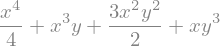

In [ ]:
integrate(r,x) 

## Programación Orientada a Objetos

Cada una de las estructuras de python son objetos que tienen atributos (carácteristicas) y metodos (funciones). Por ejemplo,


In [ ]:
lista = [3,2,1]
lista

In [ ]:
lista.sort()  
lista

### ¿Pero como se contruyén estos objetos?

### Ejemplo
Propiedades de un vector en dos dimensiones:

Sean $\vec{A} = (a_1,a_2)$ y $\vec{B} = (b_1,b_2)$ dos vectores, estos cumplen las siguientes propiedades:
 1. $\vec{A} \pm \vec{B} = (a_1 \pm b1,a_2 \pm b_2)$  
 2. $\vec{A} . \vec{B} = a_1 b_1 + a_2 b_2$
 3. $|\vec{A}| = \sqrt{\vec{A} . \vec{A}}$
 4. $\vec{A} = \vec{B}$ si y solo si $a_i = b_i$ con $i=1,2$

In [ ]:
class Vec2D(Basic):
    def __init__(self,x,y):
        self.x = x 
        self.y = y
    def __str__(self):
        return '({a},{b})'.format(a=self.x,b=self.y)
    
    def __repr__(self):
        return self.__str__()
    def __add__(self,other):
        x1,x2 = self.x,self.y
        y1,y2 = other.x,other.y
        return Vec2D(x1+y1,x2+y2)
    def __mul__(self,other):
        x1,x2 = self.x,self.y
        y1,y2 = other.x,other.y
        return x1*y1+x2*y2

In [ ]:
a1,a2,b1,b2 = symbols(r'a_1,a_2,b_1,b_2')
A = Vec2D(a1,a2)
B = Vec2D(b1,b2)
C = A*B
C

In [ ]:
A + B

In [ ]:
class Vec2D(Basic):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return '({a},{b})'.format(a=latex(self.x), b=latex(self.y))
    
    def __repr__(self):
        return self.__str__()
    
    def __add__(self,other):
        x1, y1 = self.x, self.y
        x2, y2 = other.x, other.y
        return Vec2D(x1 + x2, y1 + y2)
    
    def __sub__(self,other):
        x1, y1 = self.x, self.y
        x2, y2 = other.x, other.y
        return Vec2D(x1 - x2, y1 - y2)
    
    def __mul__(self,other):
        x1, y1 = self.x, self.y
        x2, y2 = other.x, other.y
        return x1*x2+y1*y2
    
    def __eq__(self,other):
        x1, y1 = self.x, self.y
        x2, y2 = other.x, other.y
        return x1 == x2 and y1 == y2
    
    def __abs__(self):
        return sqrt(self*self)

In [ ]:
a1, a2, b1, b2 = symbols(r'a_1, a_2, b_1, b_2') 
A = Vec2D(a1,a2)
B = Vec2D(b1,b2)

In [ ]:
A

In [ ]:
A+B

In [ ]:
A-B

In [ ]:
 A==B

False

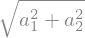

In [ ]:
abs(A)

## Aplicaciones

### Cuadrimomentos.

Un cuadrimomento cumple las siguientes propiedades:

Sean $p = (p^0,p^1,p^2,p^3)$ y $k = (k^0,k^1,k^2,k^3)$ dos cuadrimomentos, estos cumplen las siguientes propiedades:
 1. $p \pm k = (p^0 \pm k^0, p^1 \pm k^1, p^2 \pm k^2, p^3 \pm k^3)$  
 2. $ p_\mu k^\mu = p^0 k^0 - \vec{p}.\vec{k}$
 3. $|p| = \sqrt{p_\mu p^\mu}$
 4. $p = k$ si y solo si $p^\mu = k^\mu$ con $i=0,1,2,3$
 5. se puede construir una matriz con componentes $ L^{\mu \nu} = p^\mu k^\nu$.

In [ ]:
from kinematics import FV, adj, SpinorU, SpinorV

In [ ]:
p0,p1,p2,p3 = symbols(r'{{p^{0:4}}}',positive=True) 
k0,k1,k2,k3 = symbols(r'{{k^{0:4}}}',positive=True)
p = FV(p0,p1,p2,p3)
k = FV(k0,k1,k2,k3)
p,k

In [ ]:
p+k

In [ ]:
p*k

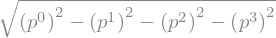

In [ ]:
abs(p)

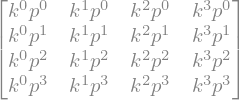

In [ ]:
p@k

### Espinores de Dirac

Sabemos que los espinores de Dirac $u(p,s)$ y $v(p,s)$, son de la forma:

\begin{equation*}
u(p,s) =  \begin{pmatrix}
\phi^s \\
\frac{\sigma \cdot \vec{p}}{p^0 + m} \phi^s 
\end{pmatrix}; \qquad
v(p,s) =  \begin{pmatrix}
\frac{\sigma \cdot \vec{p}}{p^0 + m} \phi^s\\
\phi^s  
\end{pmatrix} \qquad
\end{equation*}

donde $s = 1,2$. Una de las propiedades que ellos cumplen es siguiente:
$$\sum_{s} u \overline{u} = \gamma_\mu p^\mu + m; \qquad \sum_{s} v \overline{v} = \gamma_\mu p^\mu - m$$

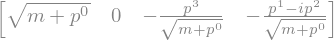

In [ ]:
m = symbols('m',positive=True)
u = lambda s:SpinorU(p,m,s)
adj(u(1))

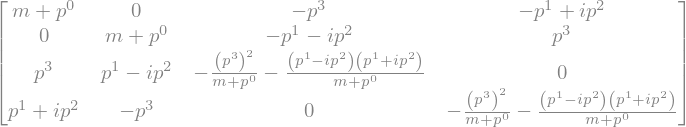

In [ ]:
r1 = Add(*[u(s)*adj(u(s)) for s in [1,2]])
r1 

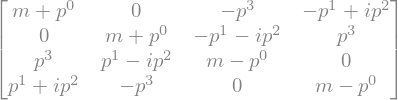

In [ ]:
r2 = p.slash() + m*eye(4)
r2

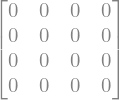

In [ ]:
(r1-r2).simplify().subs({p*p:m**2})

### Proceso $e^+ e^- \rightarrow \gamma \rightarrow \mu^+ \mu^-$

In [ ]:
IFrame('https://arxiv.org/pdf/1602.04182.pdf', width=600, height=600)

In [45]:
from sympy import sin, cos, mgamma, msigma

g = [[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]]

E, θ = symbols(r'E, theta',positive=True)
pp = symbols(r'p',positive=True)

pmu1 = FV(E,0,0,E)
pmu2 = FV(E,0,0,-E)
pmu3 = FV(E,E*sin(θ),0,E*cos(θ))
pmu4 = FV(E,-E*sin(θ),0,-E*cos(θ))

display(pmu3)
display(pmu4)

ImportError: cannot import name 'mgamma' from 'sympy' (c:\Users\moise\miniconda3\envs\py37\lib\site-packages\sympy\__init__.py)

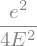

In [46]:
s = (pmu1+pmu2)*(pmu1+pmu2)
e, me, mmu = symbols(r'e, m_e, m_\mu',positive=True)
A = e**2/(s)
A

In [44]:
u3 = lambda s3:SpinorU(pmu3,mmu,s3)
v4 = lambda s4:SpinorV(pmu4,mmu,s4)
v2 = lambda s2:SpinorV(pmu2,me,s2)
u1 = lambda s1:SpinorU(pmu1,me,s1)
M = lambda s1,s2,s3,s4:Add(*[((adj(u3(s3))*g[μ][ν]*mgamma(ν)*v4(s4))*(adj(v2(s2))*mgamma(μ)*u1(s1)))[0] 
                             for μ in range(4) for ν in range(4)])
M(1,1,1,1).factor()

NameError: name 'mgamma' is not defined

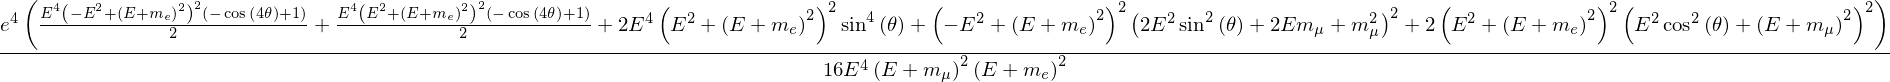

In [223]:
spins = [1,2]
r = Add(*[M(s1,s2,s3,s4)*conjugate(M(s1,s2,s3,s4)) for s1 in spins for s2 in spins for s3 in spins for s4 in spins])
t = A**2*(r/4).simplify()#.collect(pp3)
t

In [224]:
t = t.subs({me:0,mmu:0}).simplify().subs({sin(θ):sqrt(1-cos(θ)**2)})
t

## Potencial de Higgs

El campo de Higgs, representa una parte muy importante del exitó del model oestándar, y está regído por el potencial

$$V = m^2 \Phi^{\dagger}\Phi -\lambda (\Phi^{\dagger}\Phi)^2$$

donde 

$$\Phi = 
\begin{pmatrix}
\phi_1 + i \phi_2\\
\phi_3 + i \phi_4
\end{pmatrix}
$$

el cual, adquiere un valor de expectación en el vacío 

$$\Phi = 
\begin{pmatrix}
0\\
v/\sqrt{2}
\end{pmatrix}
$$

In [1]:
from mis_campos import *

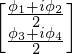

In [226]:
ϕ1, ϕ2, ϕ3, ϕ4 = (Campo_bosonico_neutro('\phi_{a}'.format(a=i)) for i in [1,2,3,4])
v = symbols(r'v', positive=True)
Φ = (S(1)/2)*Rep_gauge([ ϕ1 + I*ϕ2,(ϕ3 + I*ϕ4)])
Φ

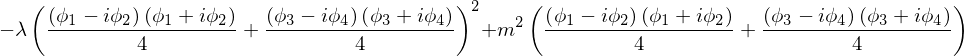

In [227]:
m, λ = symbols(r'm,\lambda',real=True)
A = (daga(Φ)*Φ)[0]
V = m**2*A - λ*A**2 
V

Para hallar las condiciones del mínimo, calculamos 
$$\frac{\partial V}{\partial \phi_3}|_{min} ==0$$

y en este caso despejaremos la variable $\lambda$

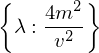

In [228]:
vev = {ϕ1:0,ϕ2:0,ϕ4:0,ϕ3:v/sqrt(2)}
cond_min = solve(diff(V,ϕ3).subs(vev),λ,dict=True)[0]
cond_min  

Luego sustituimos la condicion del mínimo en el potencial

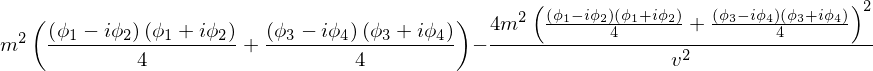

In [229]:
Vmin = V.subs(cond_min)
Vmin

Finalmente, calculamos la matrix de masa usando la definición:
$$M_{ij} = \frac{\partial^2 V}{\partial \phi_i \partial \phi_j}|_{min} $$

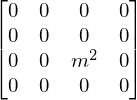

In [230]:
campos = (ϕ1,ϕ2,ϕ3,ϕ4)
M2 = Matrix([[-Vmin.diff(x).diff(y).subs(vev) for x in campos] for y in campos])
M2

### Extensiones escalares

El Modelo Estándar tiene problemas que no puede resolver, como lo son, la materia oscura o la masa del neutrino, entre otros. Por tal motivo, se buscan extensiones de este modelo, una forma particular de lograrlo es através de sectores escalares extendidos.

Consideremos el potencial del 2HDM-I, 
![potencial](potencial_escotogenic.png)



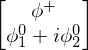

In [2]:
ϕ0 = {i:Campo_escalar_neutro(r'{{\phi^0_{a}}}'.format(a=i)) for i in [1,2]}
ϕ = {i:Campo_escalar_cargado(r'{{\phi^{a}}}'.format(a=i)) for i in ['+','-']}
Φ = Rep_gauge([ϕ['+'],ϕ0[1] + I*ϕ0[2]])
Φ

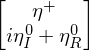

In [3]:
η0 = {i:Campo_escalar_neutro(r'{{\eta^0_{a}}}'.format(a=i)) for i in ['R','I']}
ηm = {i:Campo_escalar_cargado(r'{{\eta^{a}}}'.format(a=i)) for i in ['+','-']}
η = Rep_gauge([ηm['+'],η0['R'] + I*η0['I']])
η

In [4]:
A = (daga(Φ).subs({Dagger(ϕ['+']):ϕ['-']})*Φ)[0]
B = (daga(η).subs({Dagger(ηm['+']):ηm['-']})*η)[0]
C = (daga(Φ).subs({Dagger(ϕ['+']):ϕ['-']})*η)[0]
D = (daga(η).subs({Dagger(ηm['+']):ηm['-']})*Φ)[0]
A,B,C,D

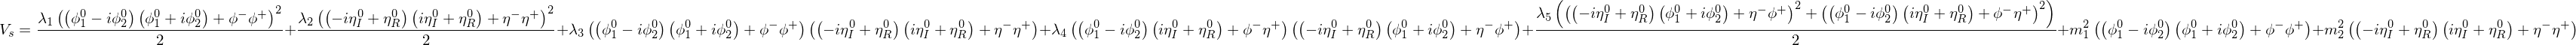

In [5]:
m_1 = Symbol(r'm_1')
m_2 = Symbol(r'm_2')
λ_1 = Symbol(r'\lambda_1')
λ_2 = Symbol(r'\lambda_2')
λ_3 = Symbol(r'\lambda_3')
λ_4 = Symbol(r'\lambda_4')
λ_5 = Symbol(r'\lambda_5')
V_s = symbols(r'V_s')
V = m_1**2*A + m_2**2*B + (λ_1/2)*A**2 + (λ_2/2)*B**2 + λ_3*A*B + λ_4*C*D + (λ_5/2)*(C**2 + D**2)
Eq(V_s, V)

Definiendo el valor de expectación en el vació

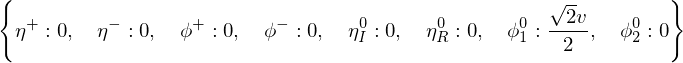

In [6]:
# vevs
v = symbols('v', real=True)
vevs = {ϕ['+']:0,ϕ['-']:0,ηm['+']:0,ηm['-']:0,ϕ0[1]:v/sqrt(2),ϕ0[2]:0,η0['R']:0,η0['I']:0}
vevs 

Condición del minímo

In [9]:
derivada = diff(V,ϕ0[1]).subs({ϕ['+']:0,ϕ['-']:0,ηm['+']:0,ηm['-']:0,ϕ0[1]:v/sqrt(2),ϕ0[2]:0,η0['R']:0})
derivada = Add(*[i.subs({η0['I']:0}) for i  in derivada.args])
#derivada

cond_min = solve(Eq(diff(V.subs(vevs),v),0),m_1**2,dict=True)[0]

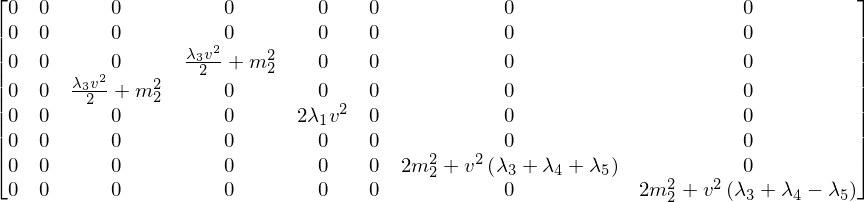

In [10]:
campos = [ϕ['+'],ϕ['-'],ηm['+'],ηm['-'],ϕ0[1],ϕ0[2],η0['R'],η0['I']]
campos

derivadas = [[diff(V.expand(),i).diff(j).subs(vevs).subs(cond_min).collect(v**2) for i in campos] for j in campos]
M = Matrix(derivadas)
M  

Ahora tenemos más campos con masa.

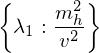

In [11]:
mh = symbols('m_h',real=True)
lambdas = {λ_1:mh**2/(v**2)}
lambdas

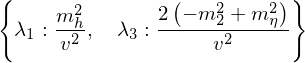

In [12]:
mη = symbols('m_\eta',real=True)
lambdas.update(solve(Eq(M[19],mη**2),λ_3,dict=True)[0])
lambdas

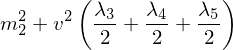

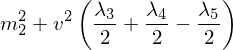

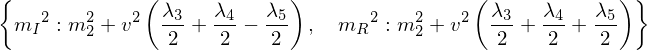

In [13]:
mR = symbols('{{m_R}}',real=True)
mI = symbols('{{m_I}}',real=True)
mRexp = expand(S(1)*M[54]/2).collect(v**2)
mIexp = expand(S(1)*M[63]/2).collect(v**2)
mRexp
mIexp
subsmasas = {mR**2:mRexp,mI**2:mIexp}
subsmasas

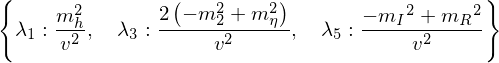

In [14]:
lambdas.update(solve(Eq((subsmasas[mI**2]-subsmasas[mR**2]).simplify(),(mI**2-mR**2)),λ_5,dict=True)[0])
lambdas

In [16]:
h = Campo_escalar_neutro('h')
nuevos_campos = [h,ηm['+'],ηm['-'],η0['R'],η0['I']]
subs_nuevos_campos = {ϕ['+']:0,ϕ['-']:0,ϕ0[1]:(v+h)/sqrt(2),ϕ0[2]:0}

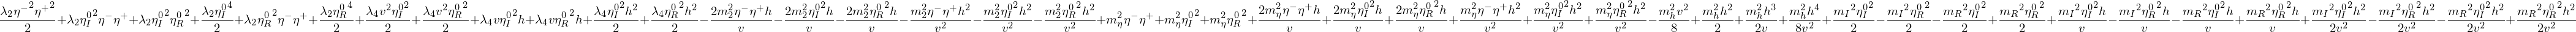

In [17]:
Vfis = conmutar_campos(V.subs(cond_min).subs(subs_nuevos_campos).subs(lambdas).expand(),nuevos_campos)
Vfis

### Los nuevos decaimientos del Higgs

In [19]:
L = lista_campos_acoplamientos(factorizar_campos(Vfis))
terminos_orden = clasificar_interacciones(L)
t3 = terminos_orden[3]
#t3

lista = latexificar(t3)
df = pd.DataFrame(lista,columns=['Acoplamientos','Interacción'])
df

,Acoplamientos,Interacción
0,$\frac{m_{h}^{2}}{2 v}$,$h^{3}$
1,$\frac{\lambda_4 v^{2} - 2 m_{2}^{2} + 2 m_\eta^{2} + {{m_I}}^{2} - {{m_R}}^{2}}{v}$,${\eta^0_I}^{2} h$
2,$\frac{\lambda_4 v^{2} - 2 m_{2}^{2} + 2 m_\eta^{2} - {{m_I}}^{2} + {{m_R}}^{2}}{v}$,${\eta^0_R}^{2} h$
3,$- \frac{2 \left(m_{2} - m_\eta\right) \left(m_{2} + m_\eta\right)}{v}$,${\eta^-} {\eta^+} h$


# Conclusiones

 - Python es un lenguaje muy fácil de usar
 - Se la interfaz Jupyter es muy visual y se acopla bien a latex
 - Tomando como base a sympy podemos realizar cálculos simbólicos enfocados a la física, creando nuestros propios objetos

In [22]:
e,eb,μ,μb, h,Z,γ= symbols(r'e,\overline{e},\mu,\overline{\mu} h,Z,γ')
interacciones = [[h,Z,Z],[h,γ,γ],[h,e,eb],[h,μ,μb],[Z,e,eb],
                 [Z,μ,μb],[γ,e,eb],[γ,μ,μb]]
interacciones[3]
Vertice3(h,e,eb) == Vertice3(h,eb,e)

True

In [23]:
vertices = [Vertice3(*inte) for inte in interacciones]
vertices

In [24]:
lista_diagramas = Diagramas212([e,eb],[μ,μb],interacciones)
lista_diagramas

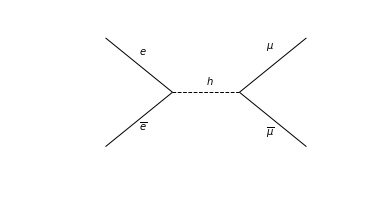

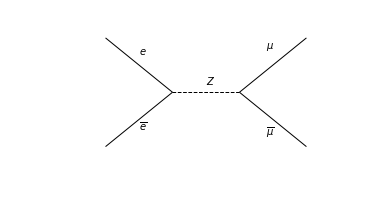

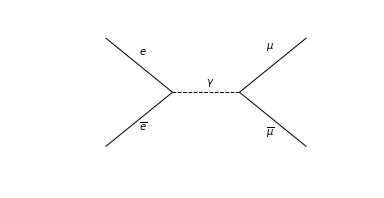

In [25]:
for i in lista_diagramas:
    T212(i)